In [2]:
import tensorflow.compat.v2 as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

We are using hand written numbers dataset.

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train), len(X_test)

(60000, 10000)

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5

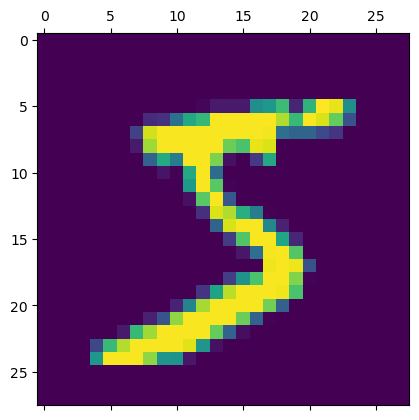

In [7]:
plt.matshow(X_train[0])
y_train[0]

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
# Now we scaled the values (Normalizing)
X_train = X_train/255
X_test = X_test/255

In [11]:
# Flattern the training dataset 
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Creating Simple Neural network.

In [13]:
# Creating Simple Neural network.
'''This NN containg only 2 layers 1st is a 
    input layer and 2nd is a output layer'''

model = tf.keras.Sequential([
            keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
        ])

model.compile(
                optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy']
            )

# Fitting the model
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4696 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3035 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 987us/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9261


In [14]:
# Evaluate the model on test dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 984us/step - loss: 0.2683 - accuracy: 0.9239


[0.2682972848415375, 0.9239000082015991]

In [15]:
# Predictions
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 881us/step


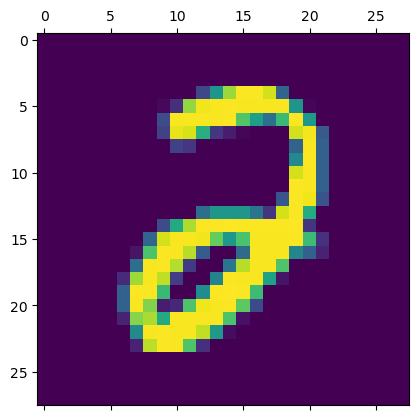

In [16]:
# Visualize the number
plt.matshow(X_test[875])

In [17]:
# It will give you a score for every number
print(y_predicted[875])

# We need to took at the score which is the maximum
np.argmax(y_predicted[875])

[1.3736714e-01 3.8166297e-07 9.9445355e-01 1.6841806e-01 1.7858647e-02
 2.5971418e-02 1.9697607e-01 5.0173577e-07 5.0749528e-01 7.0985351e-03]


2

In [18]:
# Converting the score (probabilites) into concrete class labels (one number)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
# Building the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Actual')

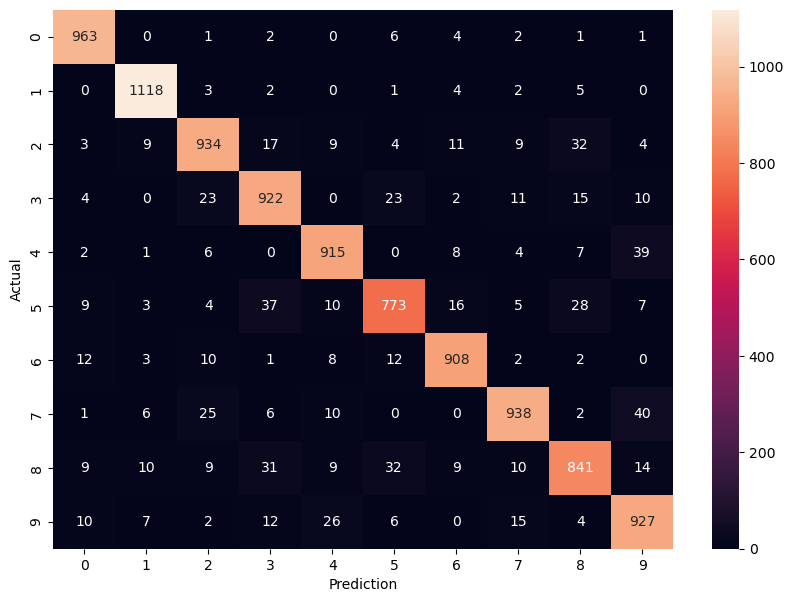

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Let's add a hidden layer and build a NN model

In [22]:
# Let's add a hidden layer and build a NN model

'''This NN containg only 3 layers 1st is a 
    input layer, 2nd layer is hidden layer having 100 neurons and 3nd is a output layer'''

model2 = tf.keras.Sequential([
            keras.layers.Dense(100, input_shape = (784,), activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

model2.compile(
                optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy']
            )

# Fitting the model
model2.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1203 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0827 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0633 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0506 - accuracy: 0.9848


In [23]:
# Evaluate the model on test dataset
model2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9782


[0.07261460274457932, 0.9782000184059143]

In [24]:
# Predictions
y_predicted_m2 = model2.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [25]:
# Converting the score into concrete class labels 
y_predicted_labels_m2 = [np.argmax(i) for i in y_predicted_m2]
y_predicted_labels_m2[:5]

[7, 2, 1, 0, 4]

In [26]:
# Building the confusion matrix
cm_m2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels_m2)

Text(95.72222222222221, 0.5, 'Actual')

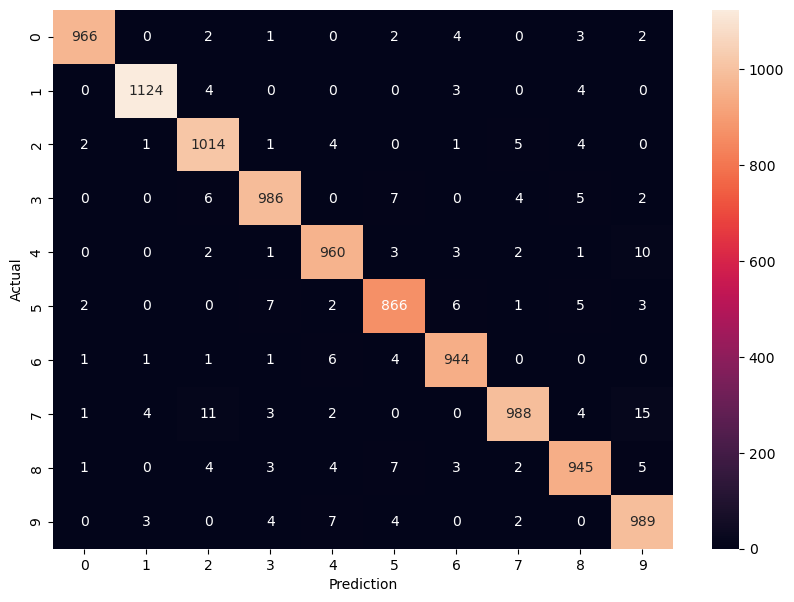

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_m2, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Keras having own flattened layer we can use that also.

In [28]:
# Keras having own flattened layer we can use that also.


'''This NN containg only 3 layers 1st is a 
    input layer, 2nd layer is hidden layer having 100 neurons and 3nd is a output layer'''

model2 = tf.keras.Sequential([
            keras.layers.Flatten(input_shape = (28,28)),
            keras.layers.Dense(100, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

model2.compile(
                optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy']
            )


# Fitting the model
model2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2762 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1249 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0861 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0658 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0511 - accuracy: 0.9843
